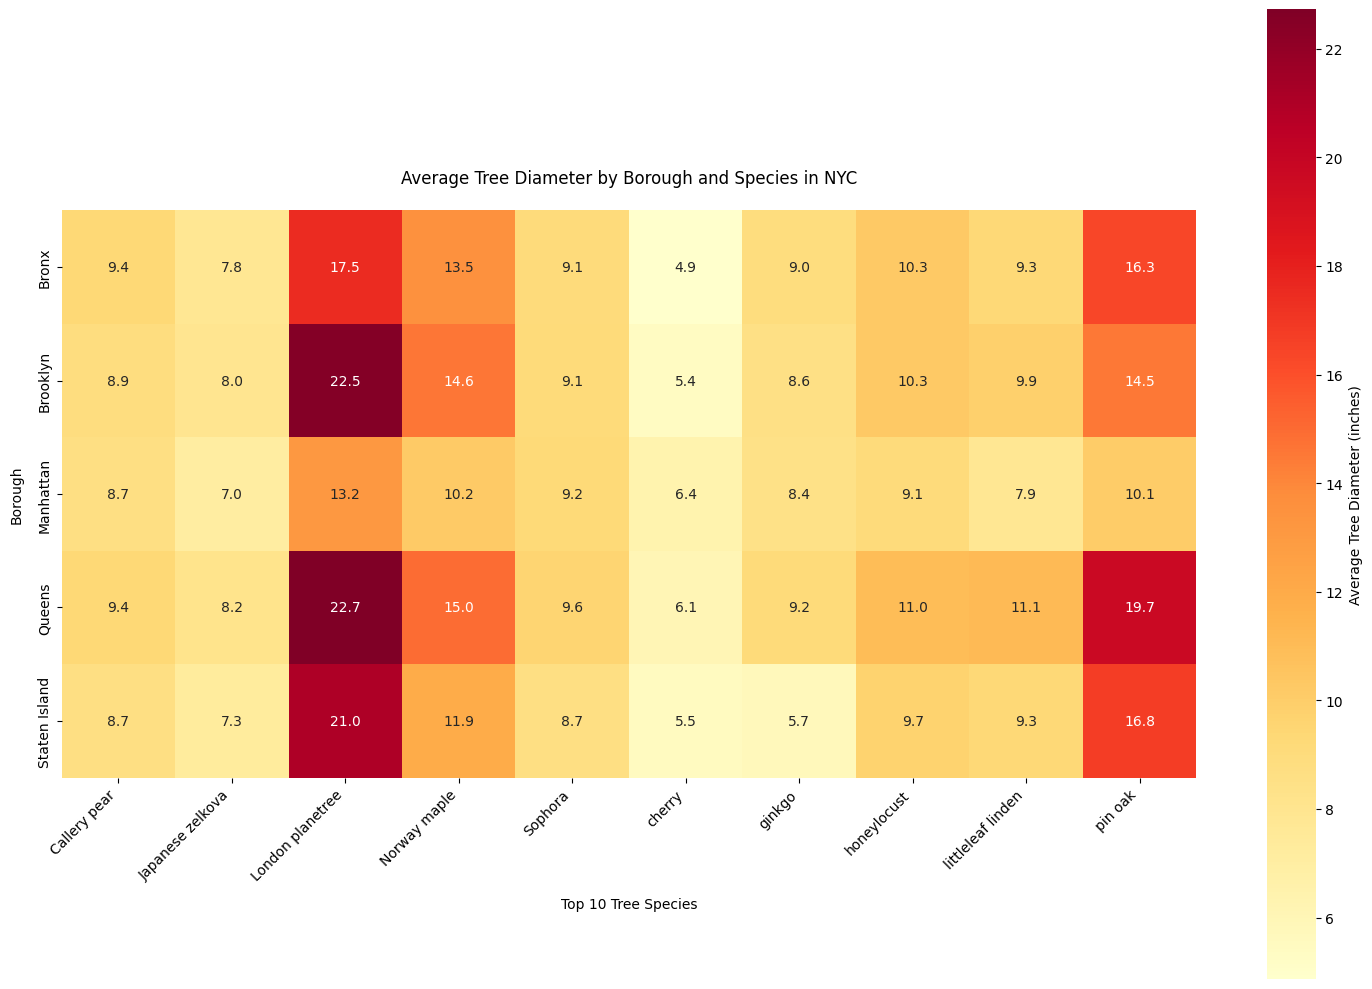


Summary Statistics:

Total number of trees: 426224

Number of trees by borough:
borough
Queens           155708
Brooklyn         116072
Staten Island     57008
Bronx             49857
Manhattan         47579
Name: count, dtype: int64

Number of trees by species:
spc_common
London planetree     87014
honeylocust          64264
Callery pear         58931
pin oak              53185
Norway maple         34189
littleleaf linden    29742
cherry               29279
Japanese zelkova     29258
ginkgo               21024
Sophora              19338
Name: count, dtype: int64

Average diameter by species:
spc_common
London planetree     21.560657
pin oak              16.867707
Norway maple         14.330516
honeylocust          10.210958
littleleaf linden    10.045827
Sophora               9.254628
Callery pear          8.958307
ginkgo                8.625476
Japanese zelkova      7.863559
cherry                5.691041
Name: tree_dbh, dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
path = '/content/data.csv'

# Read the data
df = pd.read_csv(f'{path}')

# Clean the data by removing rows with blank values
df_cleaned = df.dropna(subset=['tree_dbh', 'spc_common', 'borough', 'health'])

# Get the top 10 most common tree species
top_10_species = df_cleaned['spc_common'].value_counts().head(10).index
df_filtered = df_cleaned[df_cleaned['spc_common'].isin(top_10_species)]

# Calculate average tree diameter by borough and species
avg_diameters = df_filtered.groupby(['borough', 'spc_common'])['tree_dbh'].mean().unstack()

# Create a figure with larger size
plt.figure(figsize=(15, 10))

# Create heatmap
sns.heatmap(avg_diameters,
            annot=True,  # Show values in cells
            fmt='.1f',   # Format to 1 decimal place
            cmap='YlOrRd',  # Yellow to Orange to Red color scheme
            cbar_kws={'label': 'Average Tree Diameter (inches)'},
            square=True)

# Customize the plot
plt.title('Average Tree Diameter by Borough and Species in NYC', pad=20)
plt.xlabel('Top 10 Tree Species', labelpad=10)
plt.ylabel('Borough', labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nTotal number of trees:", len(df_filtered))
print("\nNumber of trees by borough:")
print(df_filtered['borough'].value_counts())
print("\nNumber of trees by species:")
print(df_filtered['spc_common'].value_counts())
print("\nAverage diameter by species:")
print(df_filtered.groupby('spc_common')['tree_dbh'].mean().sort_values(ascending=False))

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

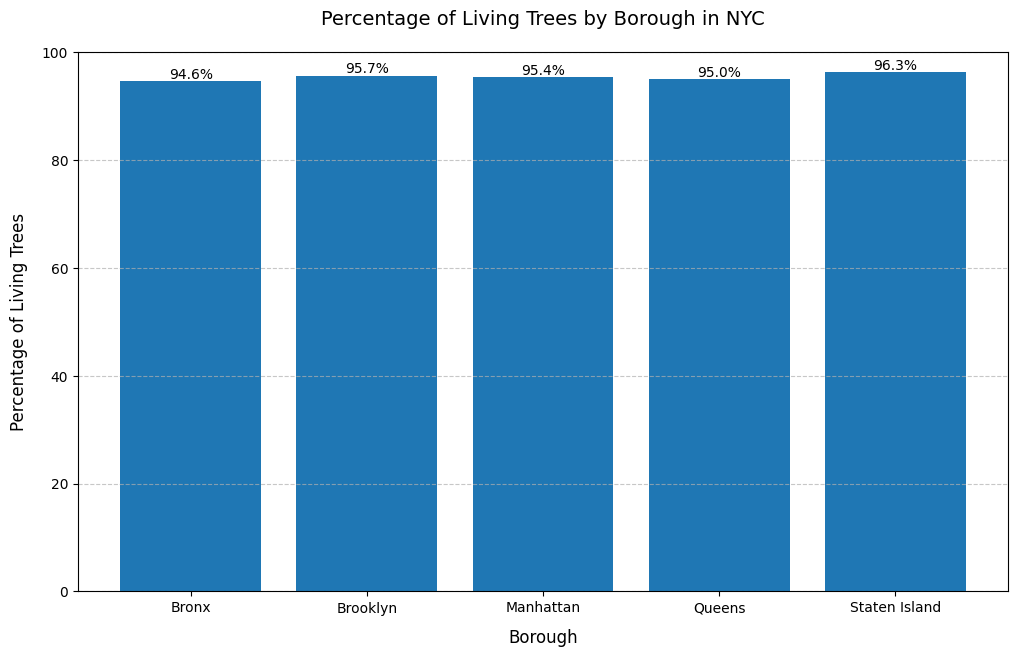

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/data.csv')

# Clean the data by removing rows with blank values
df_cleaned = df.dropna(subset=['status', 'borough'])

# Calculate percentage of alive trees by borough
alive_percent = (
    df_cleaned[df_cleaned['status'] == 'Alive']
    .groupby('borough')
    .size() / df_cleaned.groupby('borough')
    .size() * 100
).round(1)

# Create figure and axis with larger size
plt.figure(figsize=(12, 7))

# Create bar plot
bars = plt.bar(alive_percent.index, alive_percent.values)

# Customize the plot
plt.title('Percentage of Living Trees by Borough in NYC', pad=20, size=14)
plt.xlabel('Borough', labelpad=10, size=12)
plt.ylabel('Percentage of Living Trees', labelpad=10, size=12)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to go from 0 to 100
plt.ylim(0, 100)

# Add some style
# plt.style.use('seaborn')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print("\nTotal number of trees by status and borough:")
status_by_borough = pd.crosstab(df_cleaned['borough'], df_cleaned['status'])
print(status_by_borough)

print("\nPercentage of living trees by borough:")
for borough, percentage in alive_percent.items():
    print(f"{borough}: {percentage:.1f}%")

total_alive_percent = (
    len(df_cleaned[df_cleaned['status'] == 'Alive']) /
    len(df_cleaned) * 100
)
print(f"\nOverall percentage of living trees across NYC: {total_alive_percent:.1f}%")

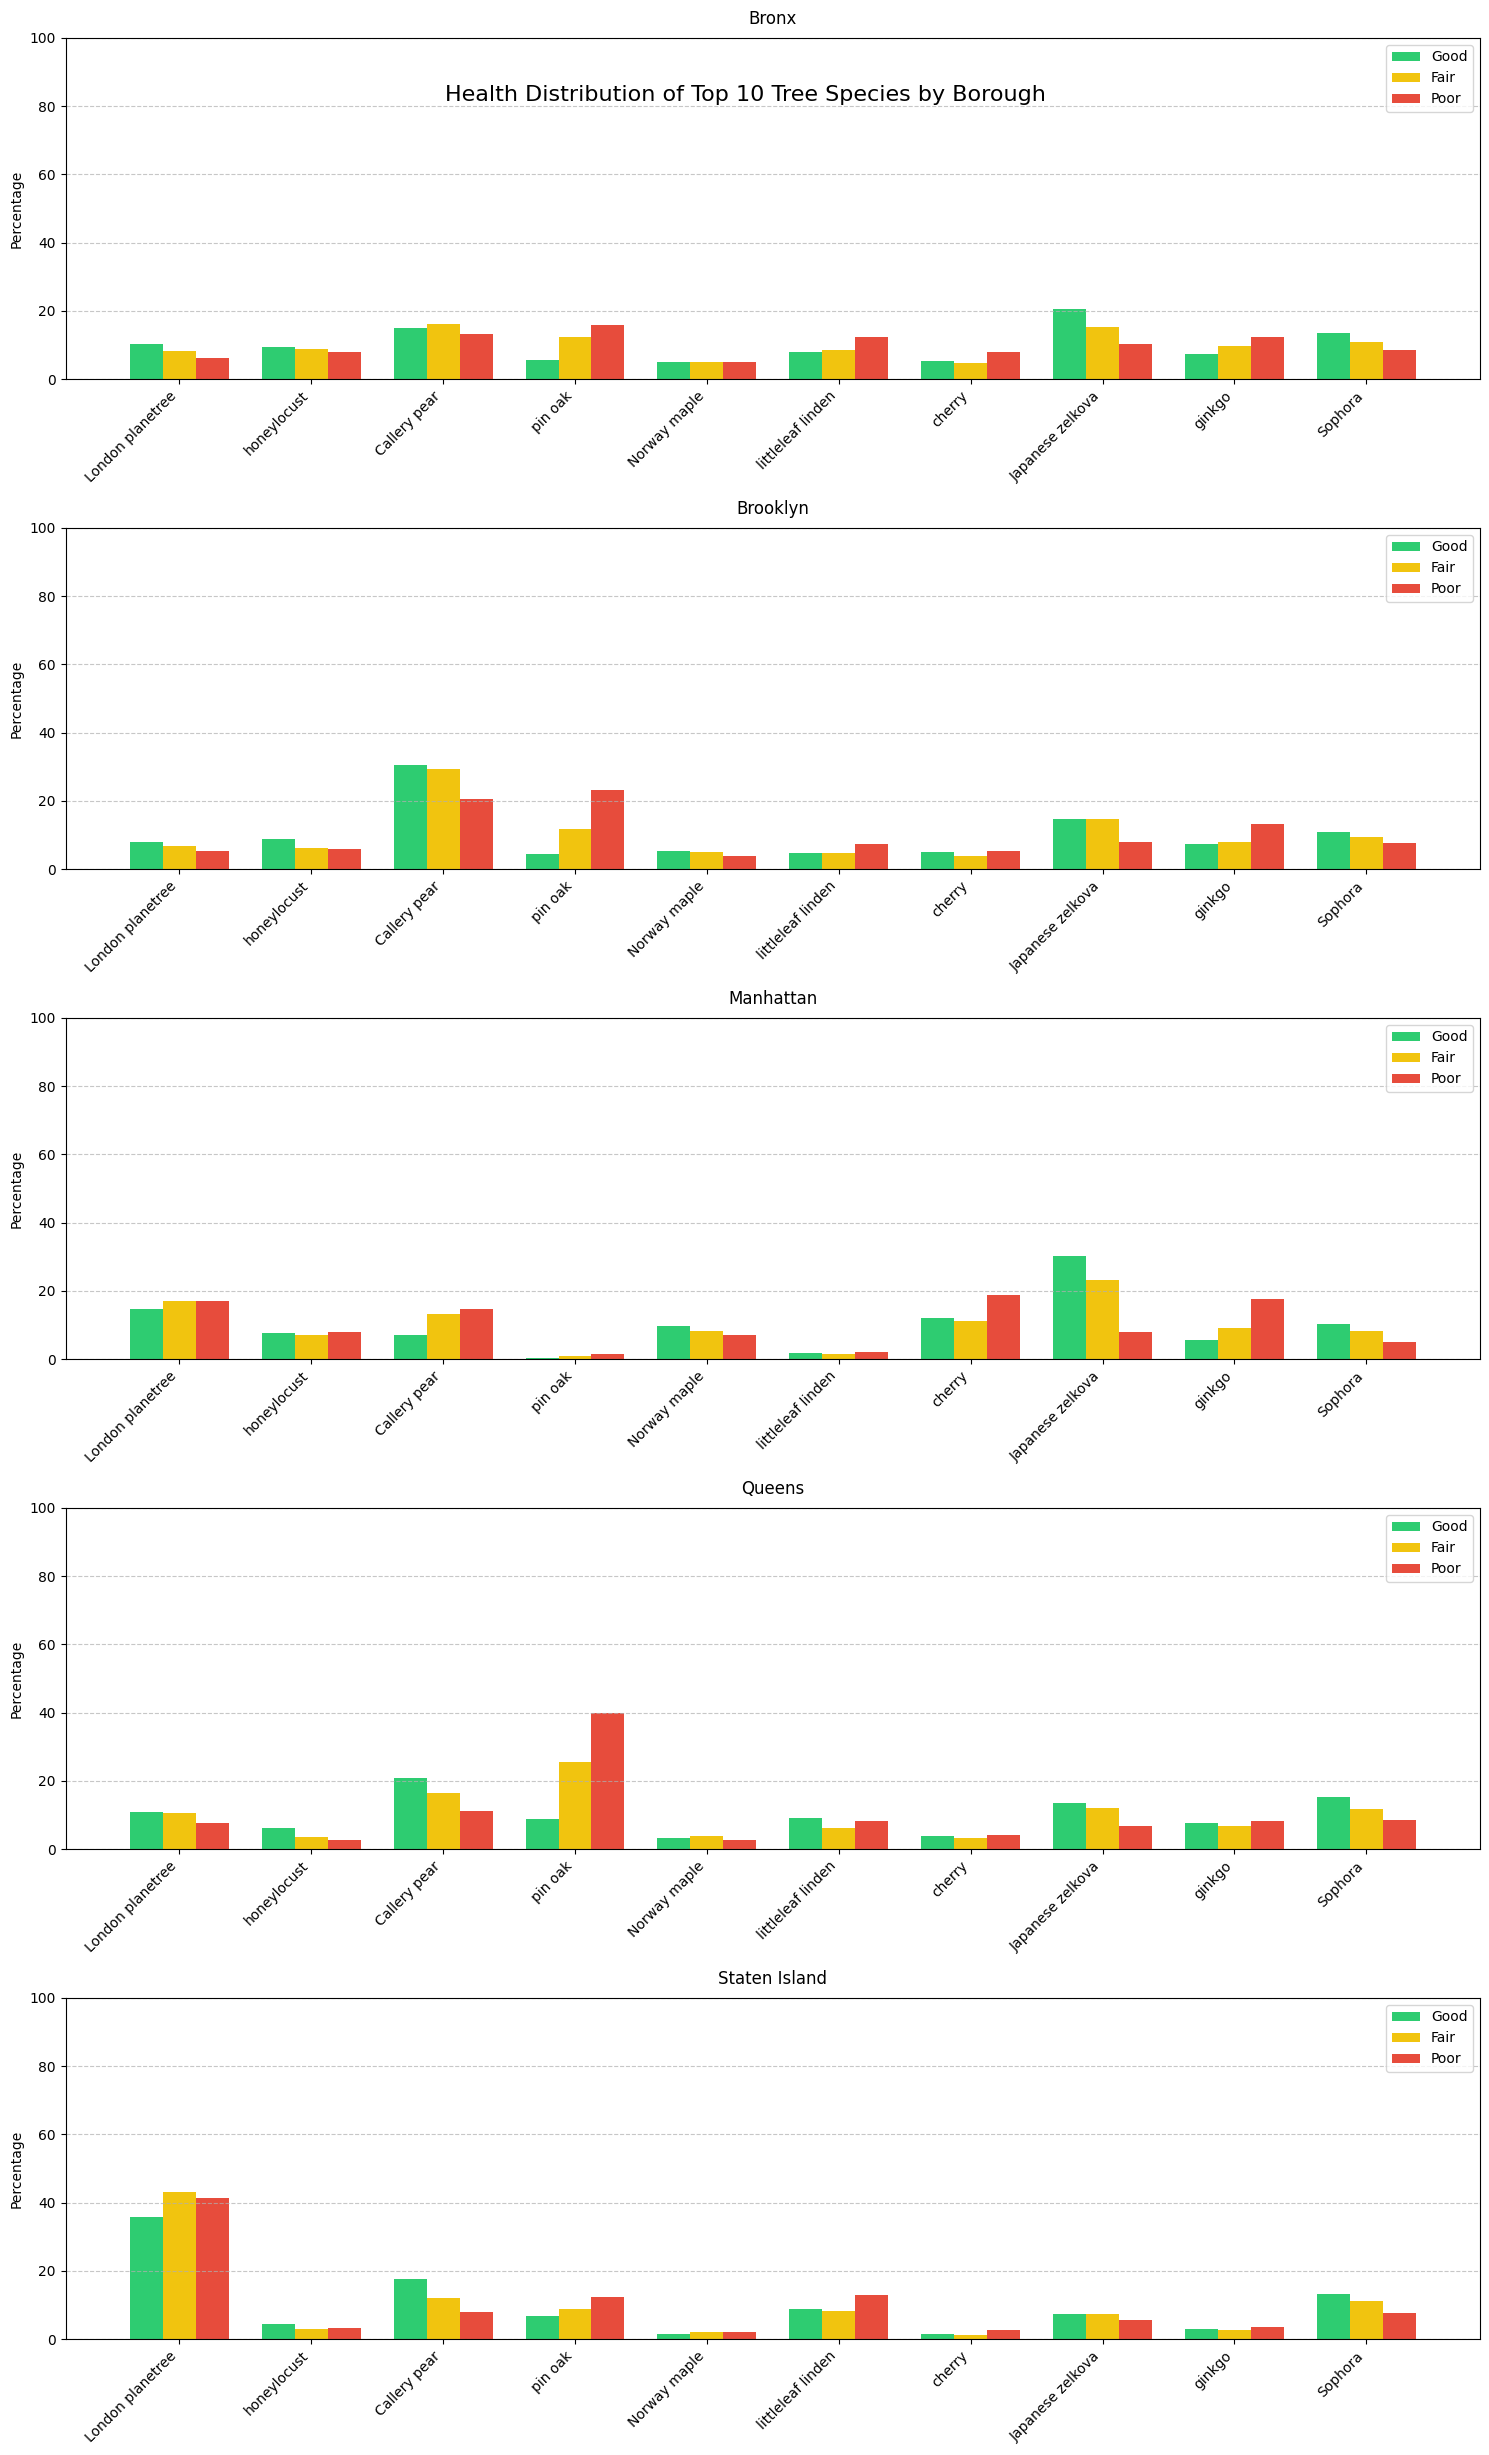


Summary Statistics:

Overall health distribution for top 10 species:
health
Fair    14.3
Good    81.9
Poor     3.8
dtype: float64

Health distribution by species (percentages):
health             Fair  Good  Poor
spc_common                         
Callery pear       14.9  81.6   3.5
Japanese zelkova   10.9  86.4   2.7
London planetree   13.2  84.3   2.5
Norway maple       26.8  62.1  11.1
Sophora            14.9  81.9   3.2
cherry             11.8  83.8   4.5
ginkgo             13.2  81.5   5.3
honeylocust        13.3  84.8   1.9
littleleaf linden  14.9  79.3   5.8
pin oak            12.0  85.7   2.3

Health distribution by borough (percentages):
health         Fair  Good  Poor
borough                        
Bronx          12.5  84.2   3.3
Brooklyn       13.9  82.8   3.2
Manhattan      18.3  76.3   5.5
Queens         14.3  81.9   3.8
Staten Island  13.7  82.6   3.8


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv('/content/data.csv')

# Clean the data by removing rows with blank values
df_cleaned = df.dropna(subset=['health', 'spc_common', 'borough'])

# Get top 10 tree species
top_10_species = df_cleaned['spc_common'].value_counts().head(10).index
df_filtered = df_cleaned[df_cleaned['spc_common'].isin(top_10_species)]

# Calculate percentages of health conditions for each species in each borough
health_dist = df_filtered.groupby(['borough', 'spc_common', 'health']).size().unstack(fill_value=0)
health_pct = health_dist.groupby(level=0).transform(lambda x: (x / x.sum()) * 100)

# Create subplots for each borough
fig, axes = plt.subplots(5, 1, figsize=(15, 25))
fig.suptitle('Health Distribution of Top 10 Tree Species by Borough', fontsize=16, y=0.95)

# Colors for health conditions
colors = {'Good': '#2ecc71', 'Fair': '#f1c40f', 'Poor': '#e74c3c'}

# Plot for each borough
for idx, borough in enumerate(sorted(df_filtered['borough'].unique())):
    borough_data = health_pct.loc[borough]

    # Create grouped bar plot
    bar_width = 0.25
    x = np.arange(len(top_10_species))

    # Plot bars for each health condition
    for i, condition in enumerate(['Good', 'Fair', 'Poor']):
        if condition in borough_data.columns:
            axes[idx].bar(x + i*bar_width,
                         borough_data[condition],
                         bar_width,
                         label=condition,
                         color=colors[condition])

    # Customize subplot
    axes[idx].set_title(f'{borough}', fontsize=12, pad=10)
    axes[idx].set_ylabel('Percentage')
    axes[idx].set_xticks(x + bar_width)
    axes[idx].set_xticklabels(top_10_species, rotation=45, ha='right')
    axes[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[idx].legend()
    axes[idx].set_ylim(0, 100)

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nOverall health distribution for top 10 species:")
overall_health = df_filtered.groupby('health').size().div(len(df_filtered)) * 100
print(overall_health.round(1))

print("\nHealth distribution by species (percentages):")
species_health = df_filtered.groupby(['spc_common', 'health']).size().unstack()
species_health_pct = species_health.div(species_health.sum(axis=1), axis=0) * 100
print(species_health_pct.round(1))

print("\nHealth distribution by borough (percentages):")
borough_health = df_filtered.groupby(['borough', 'health']).size().unstack()
borough_health_pct = borough_health.div(borough_health.sum(axis=1), axis=0) * 100
print(borough_health_pct.round(1))